In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'grey'
plt.rcParams['grid.color'] = 'lightgrey'

In [2]:
df_basic_release = pd.read_csv('../independent_metrics/basic_release.csv', index_col='bug_id')
df_basic_beta = pd.read_csv('../independent_metrics/basic_beta.csv', index_col='bug_id')
df_basic_aurora = pd.read_csv('../independent_metrics/basic_aurora.csv', index_col='bug_id')

df_bug_inducing = pd.read_csv('../independent_metrics/bug_inducing.csv', index_col='bug_id')

df_release = pd.merge(df_basic_release, df_bug_inducing, left_index=True, right_index=True)
df_beta = pd.merge(df_basic_beta, df_bug_inducing, left_index=True, right_index=True)
df_aurora = pd.merge(df_basic_aurora, df_bug_inducing, left_index=True, right_index=True)

In [3]:
df_release = df_release[df_release.component != 'Pocket']
df_beta = df_beta[df_beta.component != 'Pocket']
df_aurora = df_aurora[df_aurora.component != 'Pocket']

In [4]:
df_release.shape

(285, 33)

In [5]:
df_beta.shape

(2614, 33)

In [6]:
df_aurora.shape

(4368, 33)

In [7]:
df_release.component = df_release.component.apply(lambda x: x.split(':')[0])
df_beta.component = df_beta.component.apply(lambda x: x.split(':')[0])
df_aurora.component = df_aurora.component.apply(lambda x: x.split(':')[0])

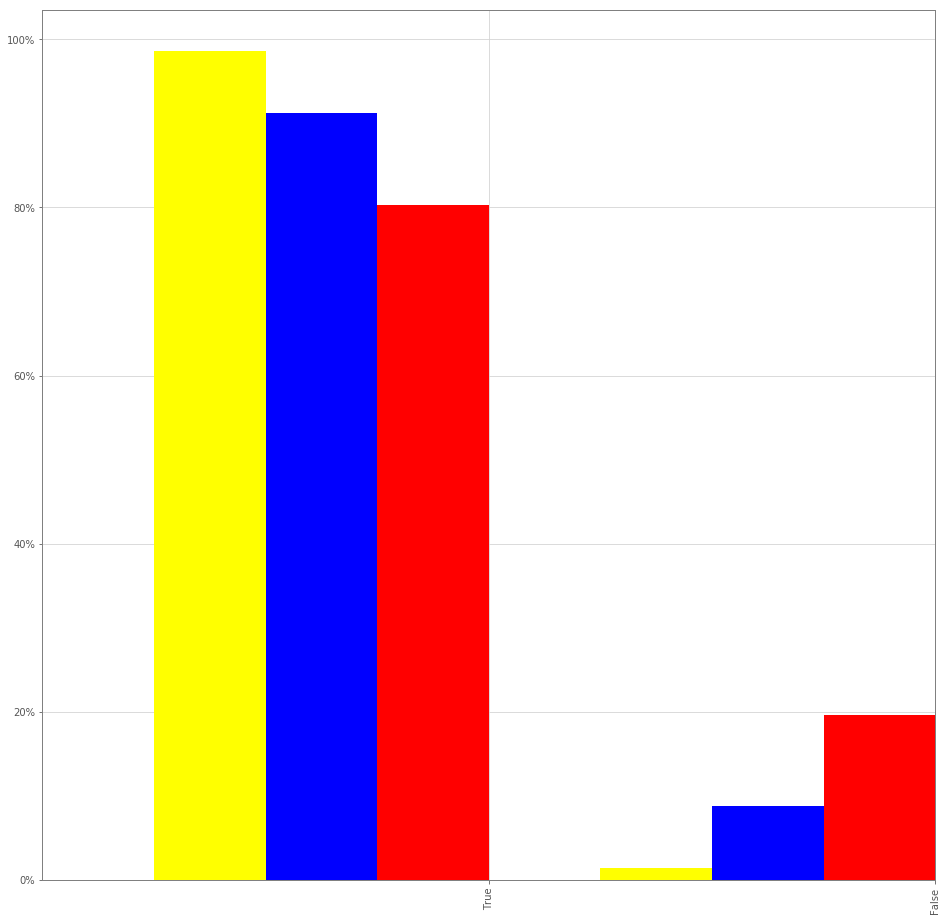

In [8]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
df_release['uplift_accepted'].value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=1, width=0.25)
df_beta['uplift_accepted'].value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=2, width=0.25)
df_aurora['uplift_accepted'].value_counts(normalize=True).plot(kind='bar', color="yellow", ax=ax, position=3, width=0.25)
plt.show()
fig.savefig('accepted_channels.svg', format='svg')

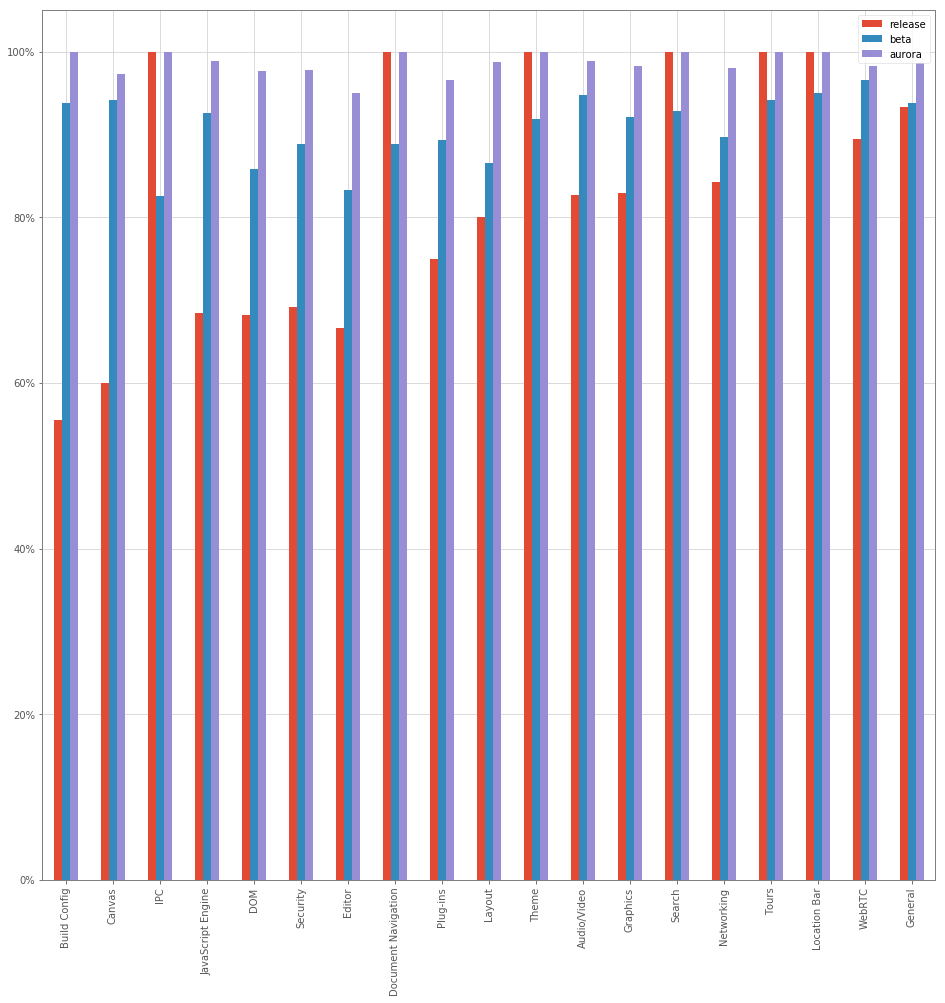

In [9]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

res1 = df_release[df_release['uplift_accepted'] == True].component.value_counts()
res1.name = 'release'
res2 = df_beta[df_beta['uplift_accepted'] == True].component.value_counts()
res2.name = 'beta'
res3 = df_aurora[df_aurora['uplift_accepted'] == True].component.value_counts()
res3.name = 'aurora'
res = pd.concat([res1, res2, res3], axis=1)

res = res[(res.release > 2) & (res.beta > 2) & (res.aurora > 2)]

res['release'] /= df_release.component.value_counts()
res['beta'] /= df_beta.component.value_counts()
res['aurora'] /= df_aurora.component.value_counts()

res = res[(res.beta != res.aurora) & (res.beta != res.release)]

res['sort_val'] = abs(res['aurora'] - res['beta']) + abs(res['beta'] - res['release'])
res.sort_values('sort_val', ascending=False).drop(['sort_val'], axis=1).plot(kind='bar', ax=ax)

plt.show()

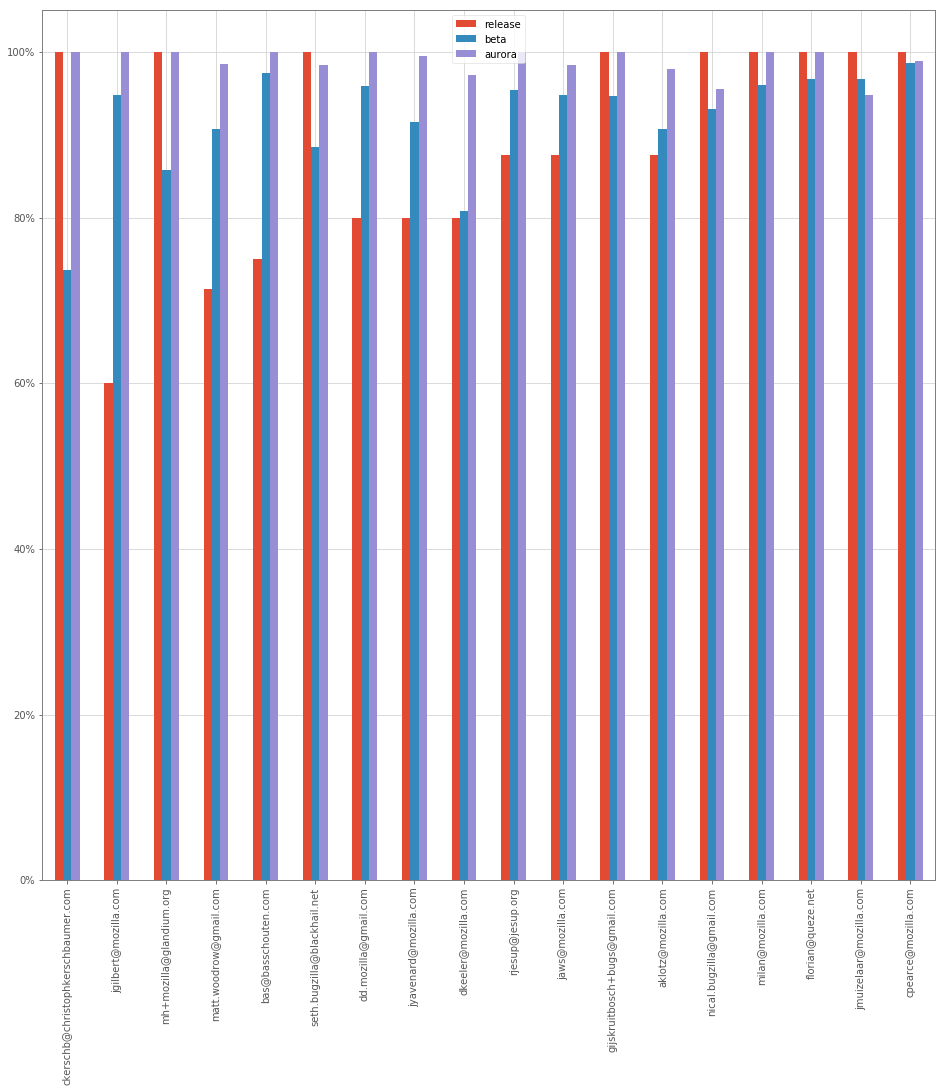

In [10]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

res1 = df_release[df_release['uplift_accepted'] == True].bug_assignee.value_counts()
res1.name = 'release'
res2 = df_beta[df_beta['uplift_accepted'] == True].bug_assignee.value_counts()
res2.name = 'beta'
res3 = df_aurora[df_aurora['uplift_accepted'] == True].bug_assignee.value_counts()
res3.name = 'aurora'
res = pd.concat([res1, res2, res3], axis=1)

res = res[(res.release > 2) & (res.beta > 2) & (res.aurora > 2)]

res['release'] /= df_release.bug_assignee.value_counts()
res['beta'] /= df_beta.bug_assignee.value_counts()
res['aurora'] /= df_aurora.bug_assignee.value_counts()

res = res[(res.beta != res.aurora) & (res.beta != res.release)]

res['sort_val'] = abs(res['aurora'] - res['beta']) + abs(res['beta'] - res['release'])
res.sort_values('sort_val', ascending=False).drop(['sort_val'], axis=1).plot(kind='bar', ax=ax)

plt.show()

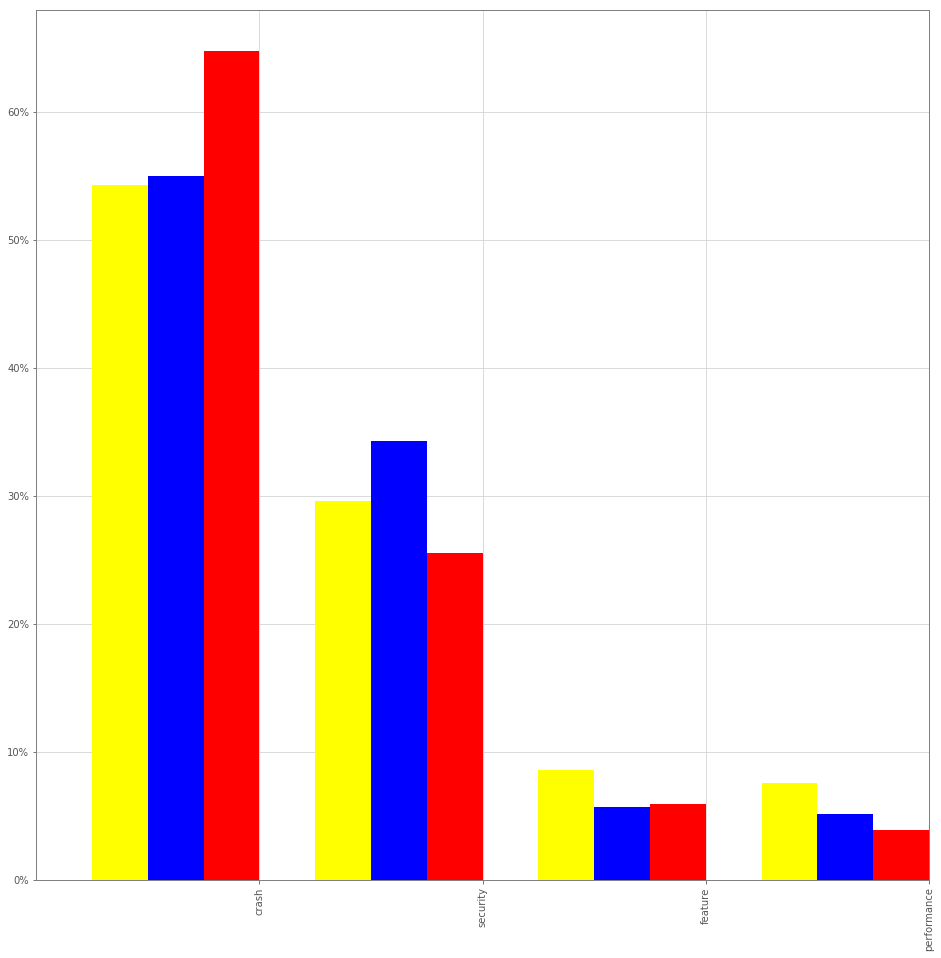

In [11]:
types_approved_release = df_release[df_release['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved_release.index = types_approved_release.index.droplevel(-1)
types_approved_release.name = 'Type'
types_approved_beta = df_beta[df_beta['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved_beta.index = types_approved_beta.index.droplevel(-1)
types_approved_beta.name = 'Type'
types_approved_aurora = df_aurora[df_aurora['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved_aurora.index = types_approved_aurora.index.droplevel(-1)
types_approved_aurora.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
types_approved_release.value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=1, width=0.25)
types_approved_beta.value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=2, width=0.25)
types_approved_aurora.value_counts(normalize=True).plot(kind='bar', color="yellow", ax=ax, position=3, width=0.25)
plt.show()
fig.savefig('accepted_uplifts_per_type_and_channel.pdf', format='pdf')

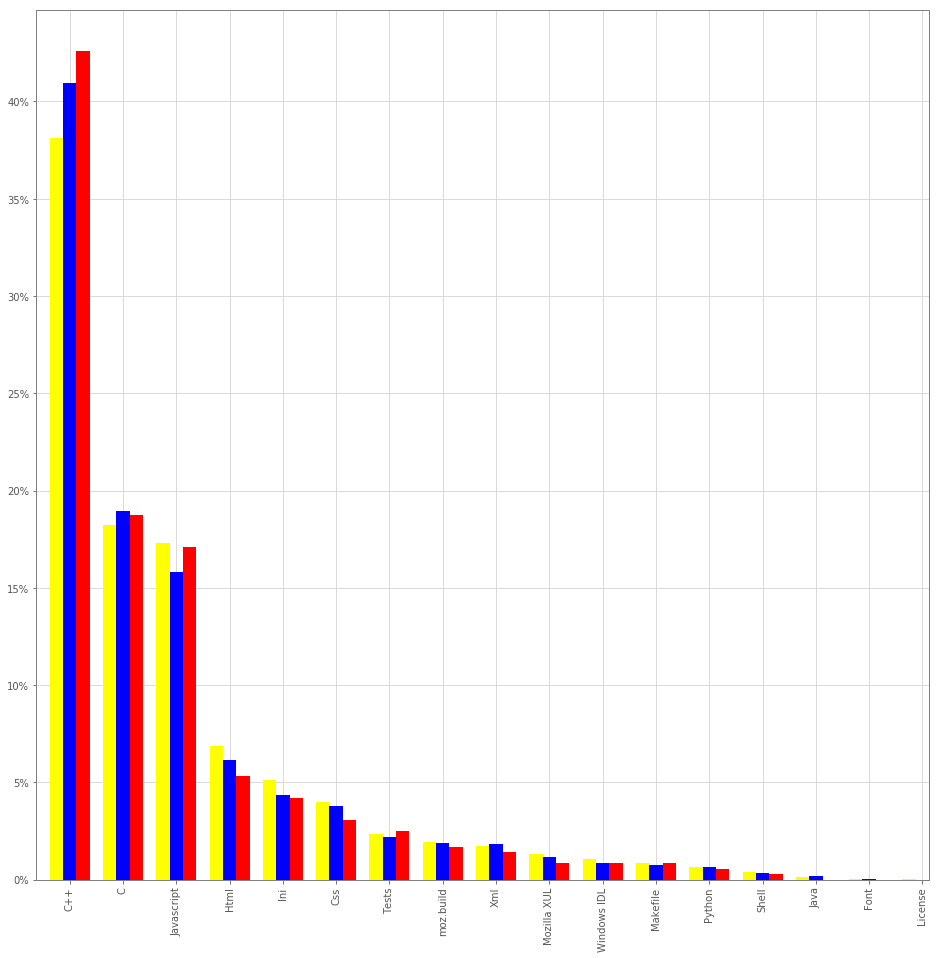

In [12]:
languages_approved_release = df_release[df_release['uplift_accepted'] == True].languages.str.split('^').apply(pd.Series, 1).stack()
languages_approved_release.index = languages_approved_release.index.droplevel(-1)
languages_approved_release.name = 'Language'
languages_approved_beta = df_beta[df_beta['uplift_accepted'] == True].languages.str.split('^').apply(pd.Series, 1).stack()
languages_approved_beta.index = languages_approved_beta.index.droplevel(-1)
languages_approved_beta.name = 'Language'
languages_approved_aurora = df_aurora[df_aurora['uplift_accepted'] == True].languages.str.split('^').apply(pd.Series, 1).stack()
languages_approved_aurora.index = languages_approved_aurora.index.droplevel(-1)
languages_approved_aurora.name = 'Language'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
languages_approved_release.value_counts(normalize=True).plot(kind='bar', color="red", ax=ax, position=-0.5, width=0.25)
languages_approved_beta.value_counts(normalize=True).plot(kind='bar', color="blue", ax=ax, position=0.5, width=0.25)
languages_approved_aurora.value_counts(normalize=True).plot(kind='bar', color="yellow", ax=ax, position=1.5, width=0.25)
plt.show()

## Release uplifts

### Approved vs rejected uplifts per component

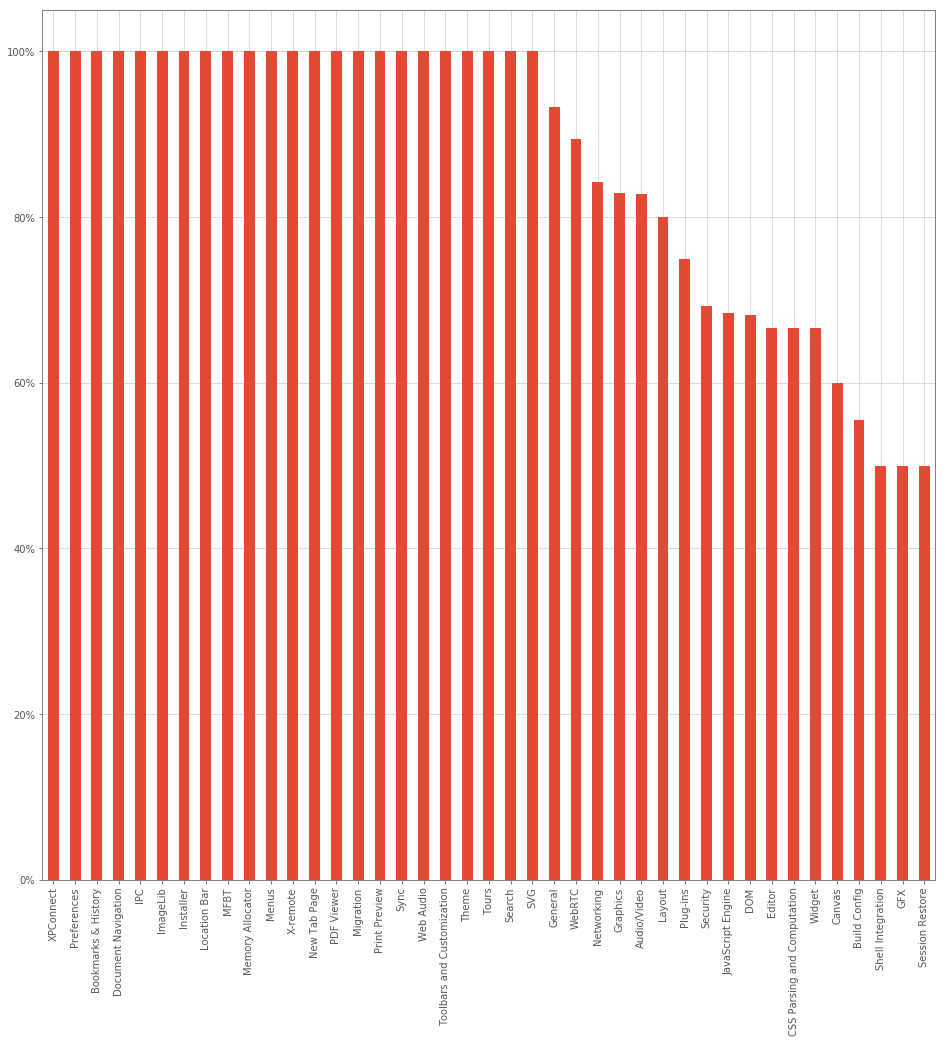

In [13]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = df_release[df_release['uplift_accepted'] == True].component.value_counts() / df_release.component.value_counts()
res.dropna().sort_values(ascending=False).plot(kind='bar', ax=ax)
plt.show()

### Approved vs rejected uplifts per bug assignee

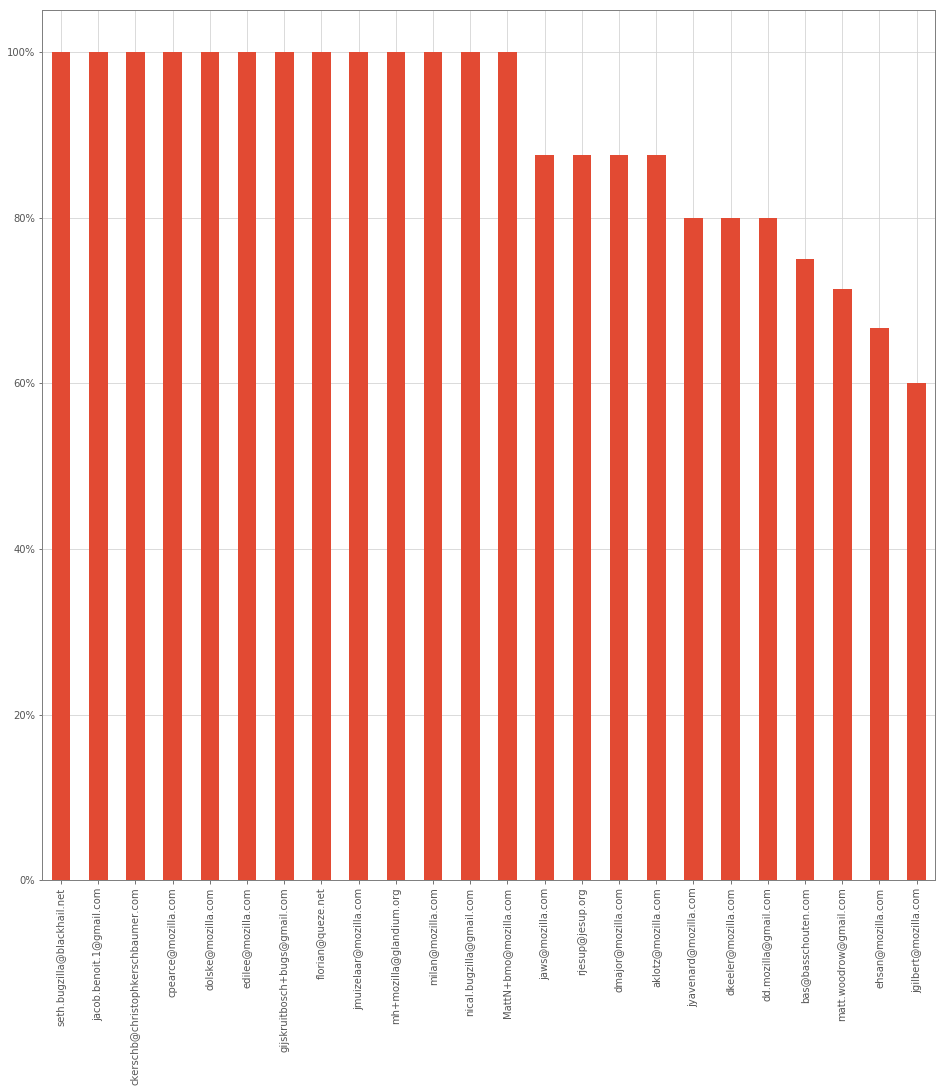

In [14]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = df_release[df_release['uplift_accepted'] == True].bug_assignee.value_counts().where(lambda x: x > 2) / df_release.bug_assignee.value_counts()
res.dropna().sort_values(ascending=False).plot(kind='bar', ax=ax)
plt.show()

### Approved vs rejected uplifts per bug type

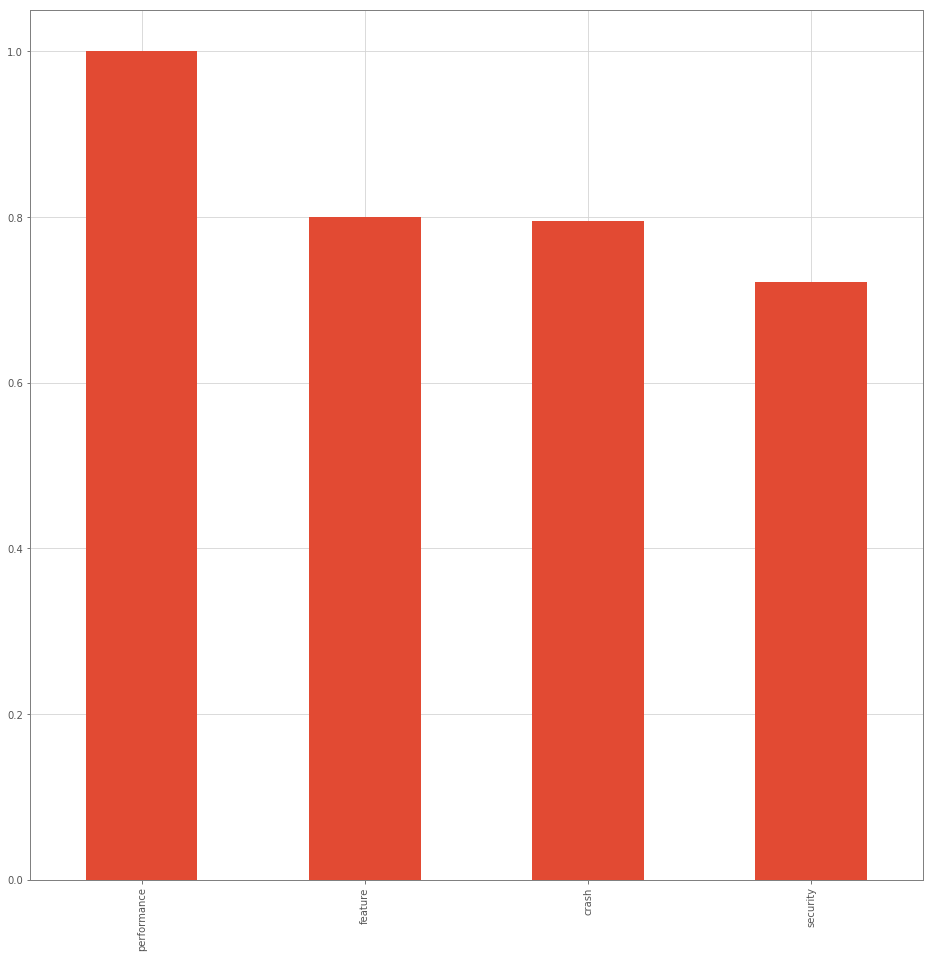

In [15]:
types = df_release.types.str.split('^').apply(pd.Series, 1).stack()
types.index = types.index.droplevel(-1)
types.name = 'Type'
types_approved = df_release[df_release['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved.index = types_approved.index.droplevel(-1)
types_approved.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
res = types_approved.value_counts() / types.value_counts()
res.sort_values(ascending=False).plot(kind='bar')
plt.show()

## Beta uplifts

### Approved vs rejected uplifts per component

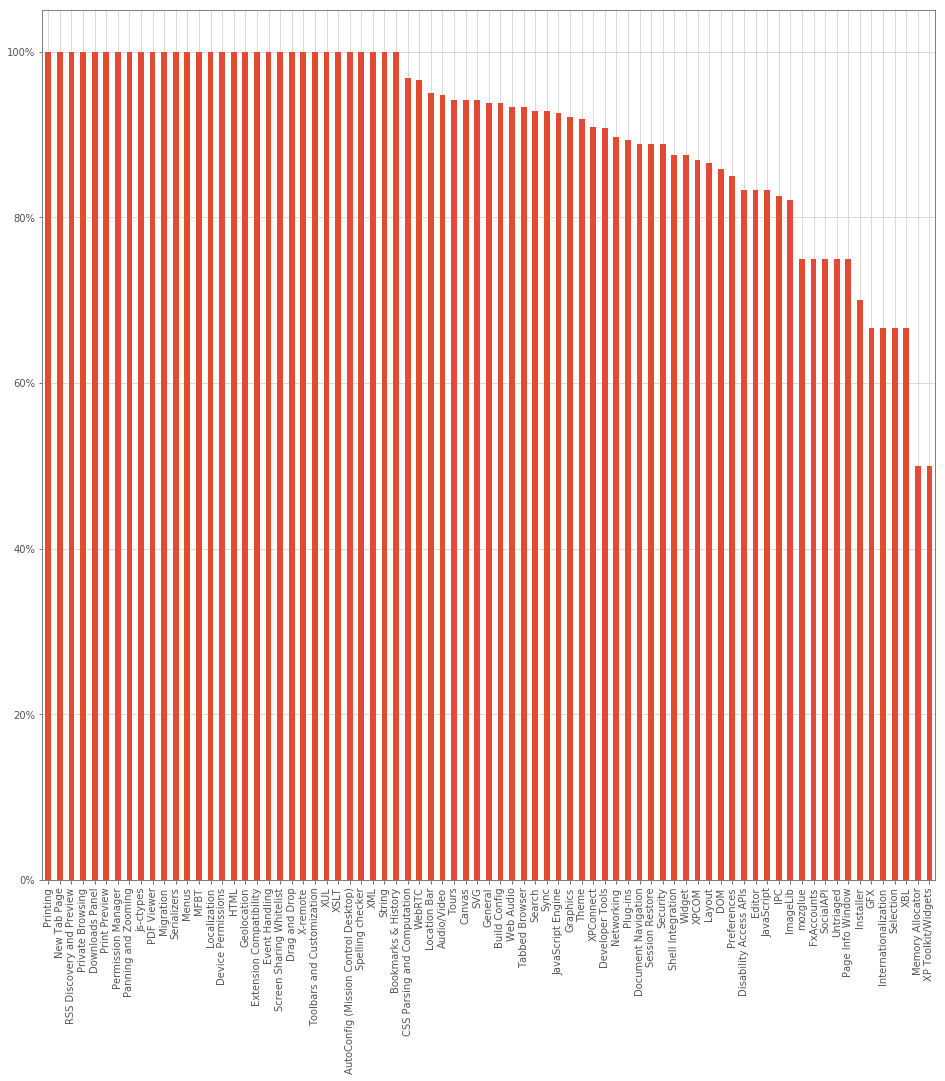

In [16]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = df_beta[df_beta['uplift_accepted'] == True].component.value_counts() / df_beta.component.value_counts()
res.dropna().sort_values(ascending=False).plot(kind='bar', ax=ax)
plt.show()

### Approved vs rejected uplifts per bug assignee

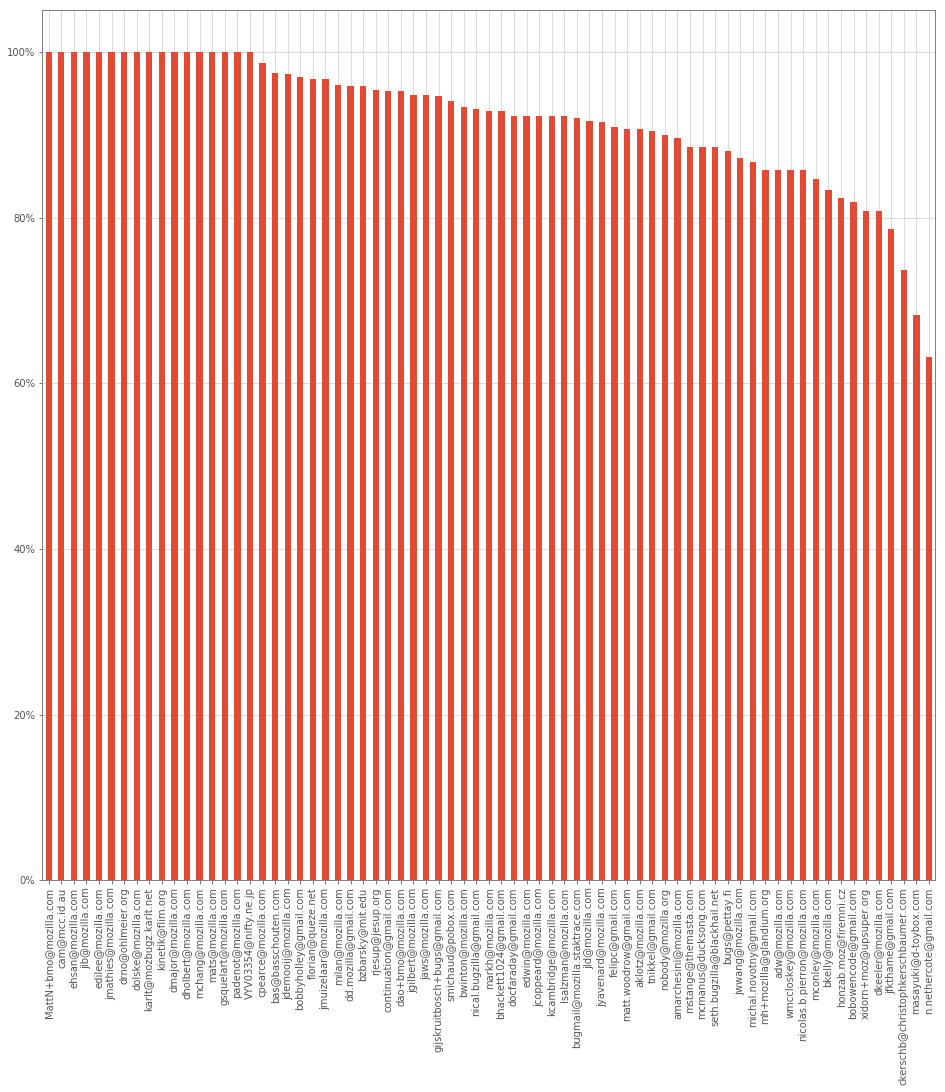

In [17]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = df_beta[df_beta['uplift_accepted'] == True].bug_assignee.value_counts().where(lambda x: x > 10) / df_beta.bug_assignee.value_counts()
res.dropna().sort_values(ascending=False).plot(kind='bar', ax=ax)
plt.show()

### Approved vs rejected uplifts per bug type

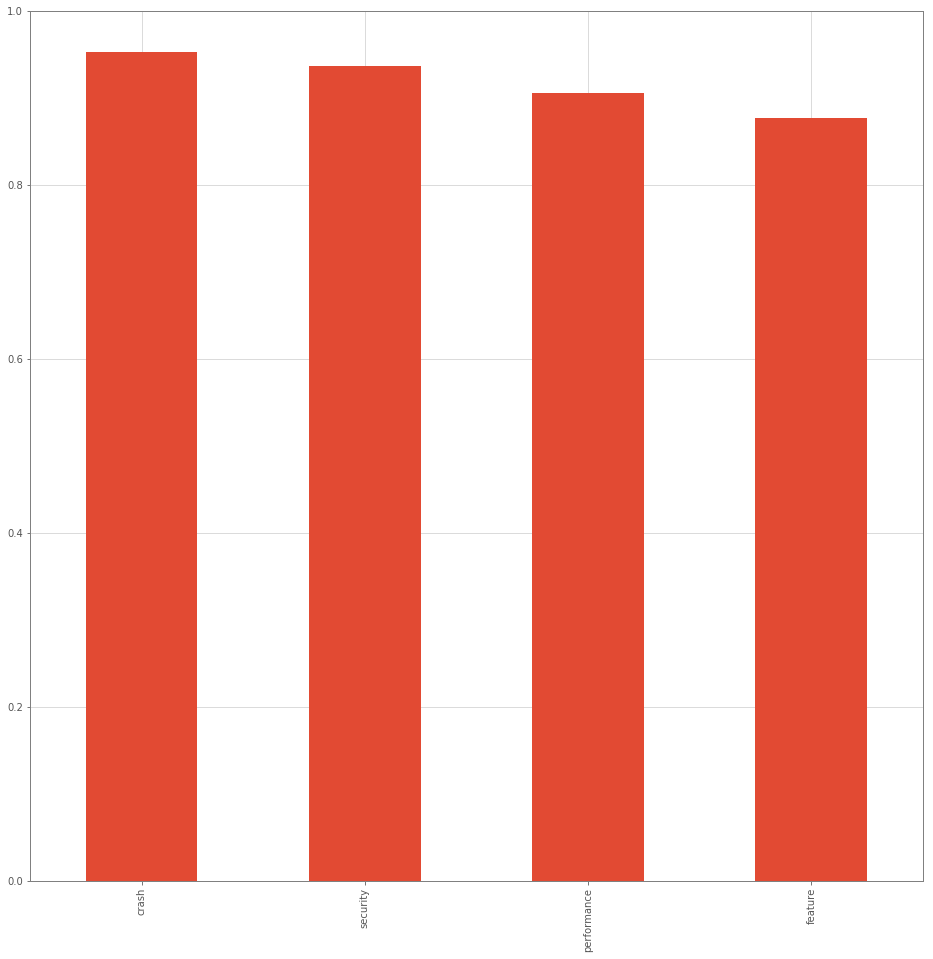

In [18]:
types = df_beta.types.str.split('^').apply(pd.Series, 1).stack()
types.index = types.index.droplevel(-1)
types.name = 'Type'
types_approved = df_beta[df_beta['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved.index = types_approved.index.droplevel(-1)
types_approved.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
res = types_approved.value_counts() / types.value_counts()
res.sort_values(ascending=False).plot(kind='bar')
plt.show()

## Aurora uplifts

### Approved vs rejected uplifts per component

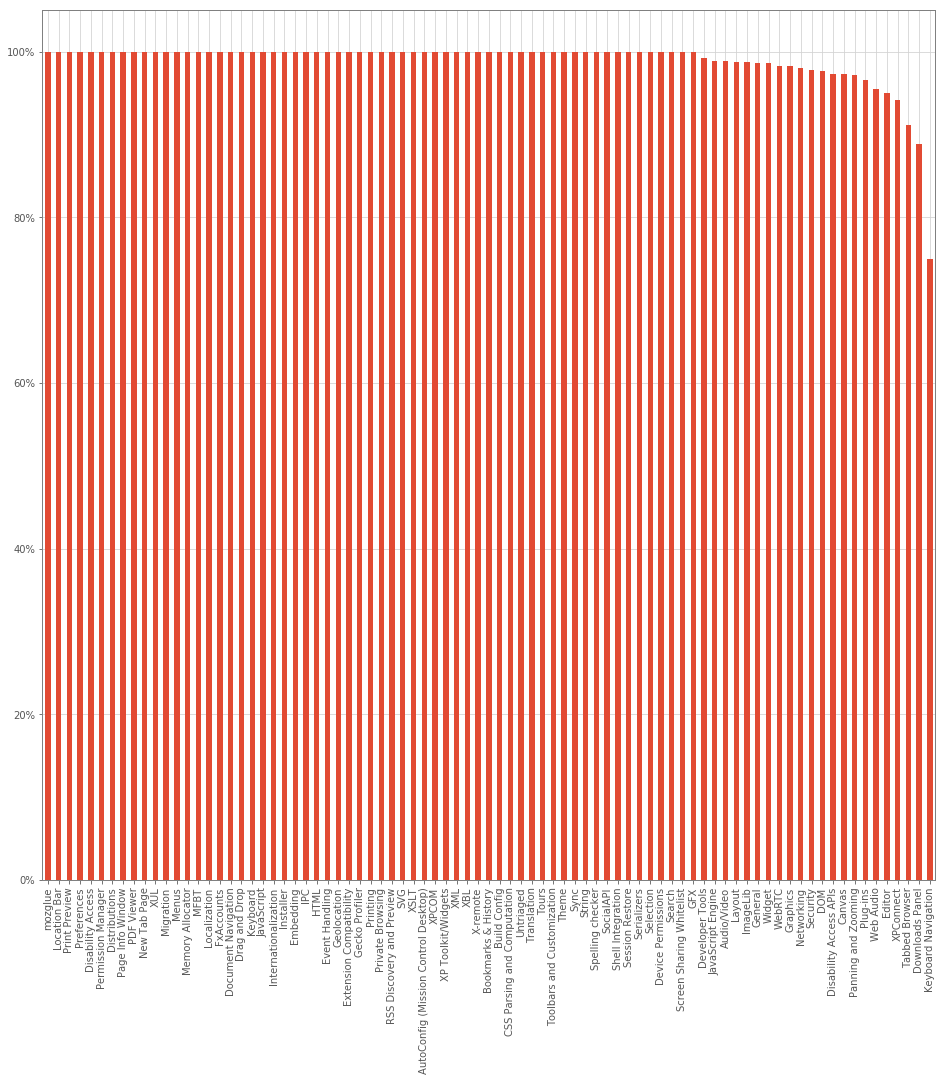

In [19]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = df_aurora[df_aurora['uplift_accepted'] == True].component.value_counts() / df_aurora.component.value_counts()
res.dropna().sort_values(ascending=False).plot(kind='bar', ax=ax)
plt.show()

### Approved vs rejected uplifts per bug assignee

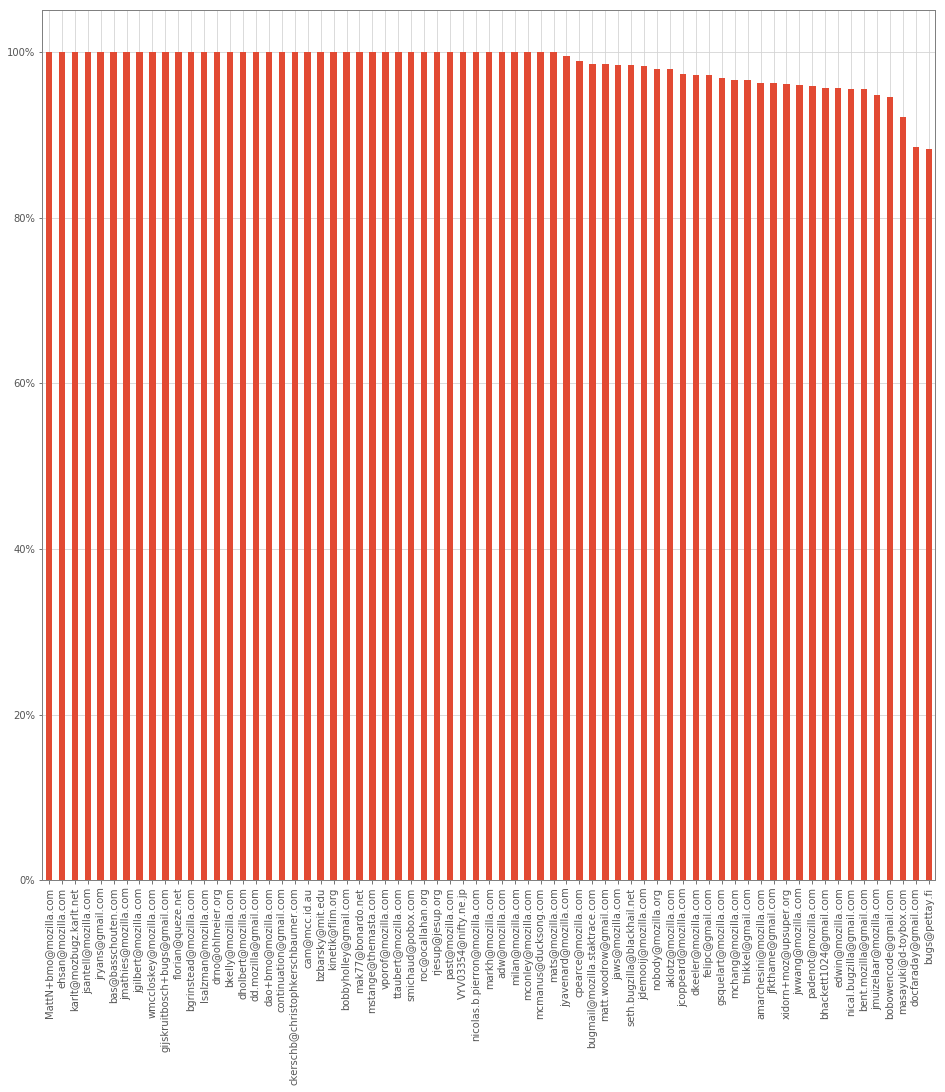

In [20]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
res = df_aurora[df_aurora['uplift_accepted'] == True].bug_assignee.value_counts().where(lambda x: x > 20) / df_aurora.bug_assignee.value_counts()
res.dropna().sort_values(ascending=False).plot(kind='bar', ax=ax)
plt.show()

### Approved vs rejected uplifts per bug type

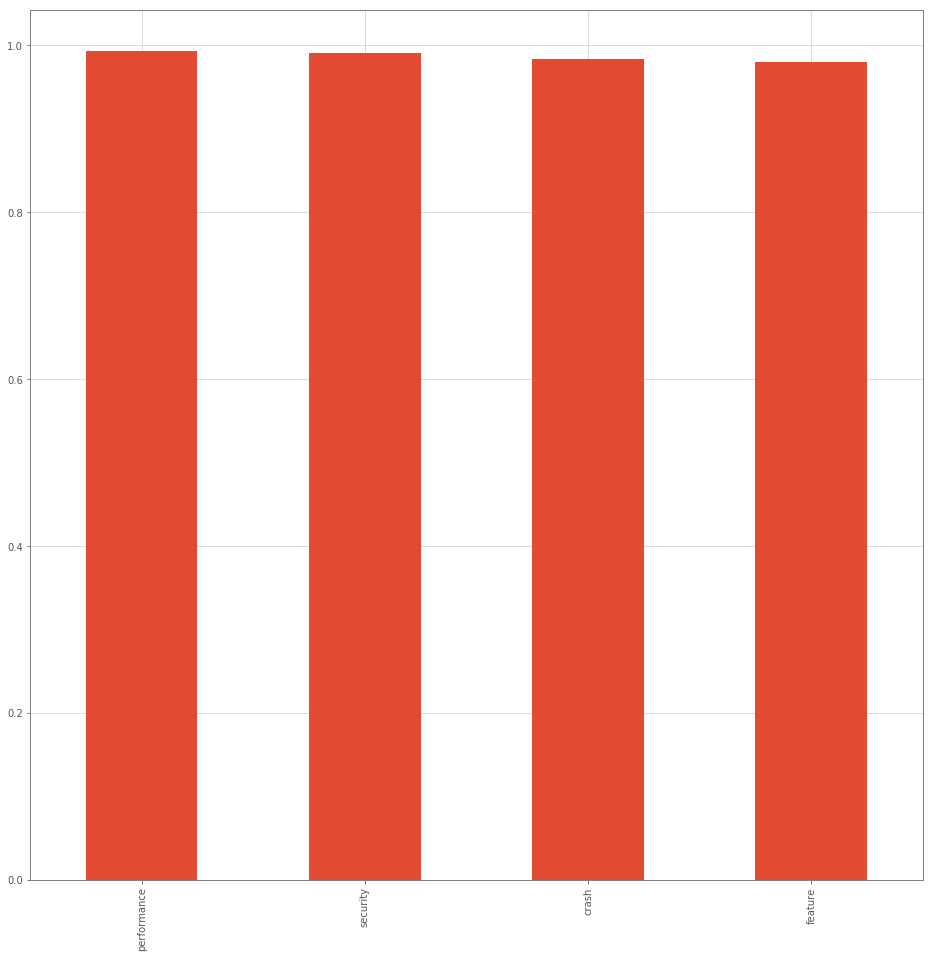

In [21]:
types = df_aurora.types.str.split('^').apply(pd.Series, 1).stack()
types.index = types.index.droplevel(-1)
types.name = 'Type'
types_approved = df_aurora[df_aurora['uplift_accepted'] == True].types.str.split('^').apply(pd.Series, 1).stack()
types_approved.index = types_approved.index.droplevel(-1)
types_approved.name = 'Type'

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
res = types_approved.value_counts() / types.value_counts()
res.sort_values(ascending=False).plot(kind='bar')
plt.show()